In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from arch.__future__ import reindexing

In [2]:
df = pd.read_csv("Data/cleaned_data.csv")

In [3]:
l_company = df["RIC"].unique()
l_company[:5]

array(['AAPL.O', 'ADBE.O', 'ADI.O', 'ADP.O', 'ADSK.O'], dtype=object)

In [4]:
df_AAPL_210902 = df.loc[df.RIC == "AAPL.O"].loc[df.Date == '2020-09-02']
df_AAPL_210902

,Unnamed: 0,BarTime,Date,Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
390,390,2020-09-02 13:30:00+00:00,2020-09-02,09:30:00,AAPL.O,137.6000,137.9800,136.00,136.0600,137.296,9662,5903852.0
391,391,2020-09-02 13:31:00+00:00,2020-09-02,09:31:00,AAPL.O,136.0700,136.6200,134.35,134.8856,135.206,18060,4249135.0
392,392,2020-09-02 13:32:00+00:00,2020-09-02,09:32:00,AAPL.O,134.8867,135.0303,133.50,134.6898,134.234,11720,2780982.0
393,393,2020-09-02 13:33:00+00:00,2020-09-02,09:33:00,AAPL.O,134.6800,135.3000,134.39,135.1800,134.938,6111,1468833.0
394,394,2020-09-02 13:34:00+00:00,2020-09-02,09:34:00,AAPL.O,135.1900,135.4500,135.03,135.2746,135.258,5674,1437657.0
...,...,...,...,...,...,...,...,...,...,...,...,...
775,775,2020-09-02 19:55:00+00:00,2020-09-02,15:55:00,AAPL.O,131.7800,131.8000,131.30,131.3101,131.502,2803,568062.0
776,776,2020-09-02 19:56:00+00:00,2020-09-02,15:56:00,AAPL.O,131.3100,131.5000,131.30,131.4300,131.382,2675,549190.0
777,777,2020-09-02 19:57:00+00:00,2020-09-02,15:57:00,AAPL.O,131.4200,131.6200,131.33,131.5380,131.506,2694,494083.0
778,778,2020-09-02 19:58:00+00:00,2020-09-02,15:58:00,AAPL.O,131.5300,131.7400,131.47,131.6629,131.657,3230,589262.0


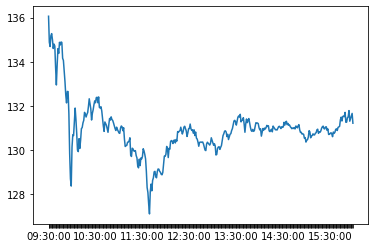

In [5]:
close = pd.Series(df_AAPL_210902.Close.values, index=df_AAPL_210902.Time)

# plot the price chart
fig, ax = plt.subplots (1,1, figsize=(6,4))
ax.plot(close)

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.show()

In [6]:
returns = close.pct_change().dropna() * 10000

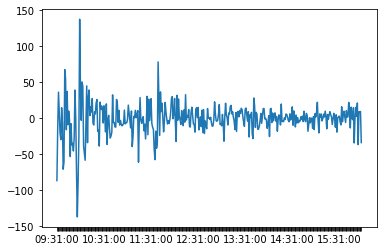

In [7]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(returns)

spacing = 60
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

plt.show()

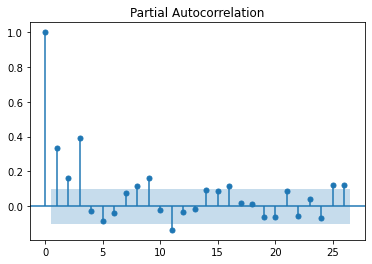

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(returns**2)
plt.show()

In [9]:
# try GARCH(3,3)
model = arch_model(returns, p=3, q=3)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1628.75
Distribution:                  Normal   AIC:                           3273.51
Method:            Maximum Likelihood   BIC:                           3305.22
                                        No. Observations:                  389
Date:                Tue, Oct 12 2021   Df Residuals:                      388
Time:                        23:48:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1316      0.686     -0.192      0.848 [ -1.476,  1.213]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         13.3091      7.788      1.709  8.746e-02   [ -1.955, 28.573]
alpha[1]       0.2127      0.101      2.115  3.439e-02 [1.563e-02,  0.410]
alpha[2]       0.0269      0.136      0.198      0.843   [ -0.239,  0.293]
alpha[3]   1.0294e-14  9.347e-02  1.101e-13      1.000   [ -0.183,  0.183]
beta[1]        0.3356      0.322      1.041      0.298   [ -0.296,  0.968]
beta[2]    3.3926e-14      0.310  1.093e-13      1.000   [ -0.608,  0.608]
beta[3]        0.3763      0.149      2.527  1.149e-02 [8.450e-02,  0.668]
==========================================================================

Covariance estimator: robust
"""

In [10]:
# 2 not significant -> GARCH(1,1)
model = arch_model(returns, p=1, q=1)
model = model.fit(disp="off")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1630.63
Distribution:                  Normal   AIC:                           3269.26
Method:            Maximum Likelihood   BIC:                           3285.12
                                        No. Observations:                  389
Date:                Tue, Oct 12 2021   Df Residuals:                      388
Time:                        23:48:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2272      0.648     -0.351      0.726 [ -1.497,  1.042]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.9295      4.409      1.572      0.116   [ -1.713, 15.571]
alpha[1]       0.1348  5.457e-02      2.470  1.353e-02 [2.781e-02,  0.242]
beta[1]        0.8415  5.534e-02     15.206  3.239e-52   [  0.733,  0.950]
==========================================================================

Covariance estimator: robust
"""

In [11]:
preds = []
test_minutes = 60
    
for i in range(test_minutes):
    data = returns[:-(test_minutes-i)]
    model = arch_model(data, p=1, q=1)
    model = model.fit(disp='off')
    pred = model.forecast(horizon=1)
    preds.append(np.sqrt(pred.variance.values[-1,:][0]))
    
preds = pd.Series(preds, index=df_AAPL_210902.Time[-test_minutes:])

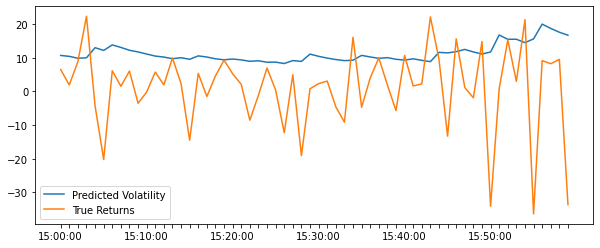

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(preds)
ax.plot(returns[-test_minutes:])
ax.legend(['Predicted Volatility', 'True Returns'])

spacing = 10
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

We can see that the predicted volatility increases when the actual change in returns increases

The test minutes variable is set to be 60 minutes for a better plot. We would be using 10 minutes since we will have the data up to 15:50 to predict the volatility of the last 10 minutes

Problems I encountered:
- Not all dates seem to be significant when trained using the GARCH model (p-values > 0.05)